## Analysis of  Gradient at hidden layers of Relu,Sigmoid and Tanh Activations

### MNIST Data from Kaggle is used as the sample data here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import layers
from models import MLP
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
train = pd.read_csv('dataset/MNIST_train.csv')
test = pd.read_csv('dataset/MNIST_test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print "train.shape = %s , test.shape = %s"%(train.shape,test.shape)

train.shape = (42000, 785) , test.shape = (28000, 784)


In [5]:
X = train.drop('label',axis=1).values
y = train['label'].values
X = X/255.0

In [6]:
from sklearn.cross_validation import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3)

In [7]:
X_train.shape

(29400, 784)

### Training 2 hidden layer Neural Network with Tanh non-linearity on MNIST data

In [8]:
input_size=784
hiddenSize1=50
hiddenSize2 = 25
output_size=10
model = MLP(input_size,hiddenSize1,hiddenSize2,output_size,hiddenLayer='tanh')

In [9]:
model.train(X_train,y_train,X_val=X_val,y_val=y_val,n_iters=10000,learning_rate=0.3)

Iteration 0, loss = 2.952037
Validation Accuracy :0.146508
Iteration 500, loss = 0.641181
Validation Accuracy :0.905635
Iteration 1000, loss = 0.593249
Validation Accuracy :0.922143
Iteration 1500, loss = 0.469557
Validation Accuracy :0.929603
Iteration 2000, loss = 0.404822
Validation Accuracy :0.933571
Iteration 2500, loss = 0.437803
Validation Accuracy :0.936905
Iteration 3000, loss = 0.407792
Validation Accuracy :0.939762
Iteration 3500, loss = 0.448744
Validation Accuracy :0.941429
Iteration 4000, loss = 0.427010
Validation Accuracy :0.941111
Iteration 4500, loss = 0.407028
Validation Accuracy :0.942619
Iteration 5000, loss = 0.431356
Validation Accuracy :0.943254
Iteration 5500, loss = 0.406183
Validation Accuracy :0.942540
Iteration 6000, loss = 0.519610
Validation Accuracy :0.943095
Iteration 6500, loss = 0.393057
Validation Accuracy :0.944048
Iteration 7000, loss = 0.399213
Validation Accuracy :0.944365
Iteration 7500, loss = 0.387646
Validation Accuracy :0.944127
Iteration 80

## Plot of the mean absolute gradient at the 2 hidden tanh layers

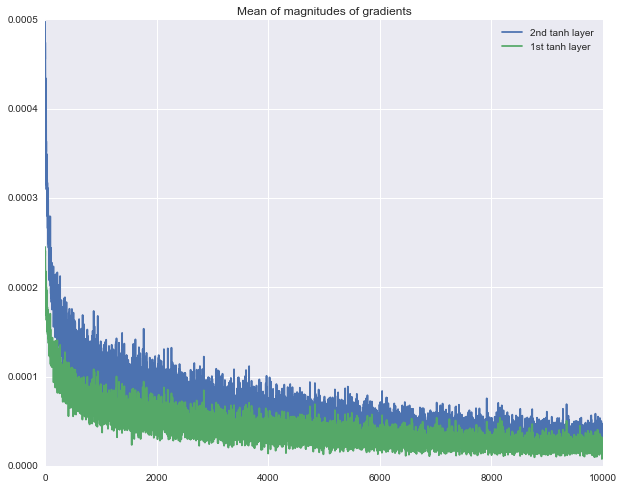

In [61]:
plt.plot(model.gradientLayer2)
plt.plot(model.gradientLayer1)
plt.title('Mean of magnitudes of gradients')
plt.legend(("2nd tanh layer", "1st tanh layer"))

In [11]:
print(model.accuracy(X_val,y_val))

0.943253968254


## Training 2 hidden layer Neural Network with Sigmoid non-linearity on MNIST data

In [21]:
sigmoid_model = MLP(input_size,hiddenSize1,hiddenSize2,output_size,hiddenLayer='sigmoid')

In [22]:
sigmoid_model.train(X_train,y_train,X_val=X_val,y_val=y_val,n_iters=10000,learning_rate=0.27)

Iteration 0, loss = 2.765393
Validation Accuracy :0.105397
Iteration 500, loss = 0.923700
Validation Accuracy :0.859127
Iteration 1000, loss = 0.717000
Validation Accuracy :0.893492
Iteration 1500, loss = 0.682575
Validation Accuracy :0.907302
Iteration 2000, loss = 0.553156
Validation Accuracy :0.916905
Iteration 2500, loss = 0.653711
Validation Accuracy :0.925000
Iteration 3000, loss = 0.615505
Validation Accuracy :0.927857
Iteration 3500, loss = 0.571191
Validation Accuracy :0.932460
Iteration 4000, loss = 0.625121
Validation Accuracy :0.936508
Iteration 4500, loss = 0.602046
Validation Accuracy :0.940000
Iteration 5000, loss = 0.565525
Validation Accuracy :0.941032
Iteration 5500, loss = 0.565837
Validation Accuracy :0.941984
Iteration 6000, loss = 0.601962
Validation Accuracy :0.944365
Iteration 6500, loss = 0.514813
Validation Accuracy :0.944762
Iteration 7000, loss = 0.541364
Validation Accuracy :0.945317
Iteration 7500, loss = 0.563364
Validation Accuracy :0.945317
Iteration 80

## Plot of the mean absolute gradient at the 2 hidden sigmoid layers

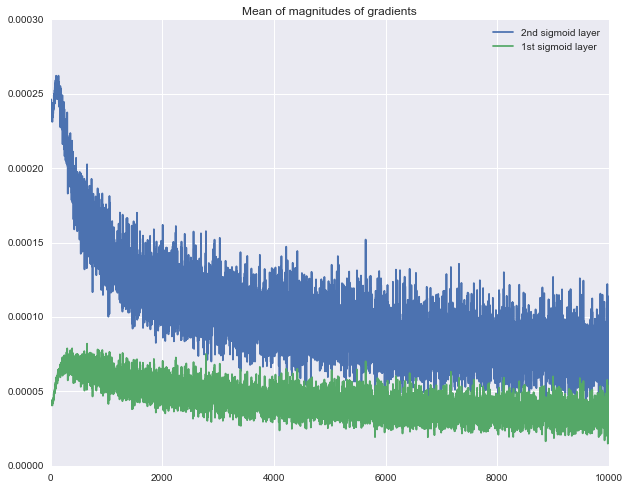

In [62]:
plt.plot(sigmoid_model.gradientLayer2)
plt.plot(sigmoid_model.gradientLayer1)
plt.title('Mean of magnitudes of gradients')
plt.legend(("2nd sigmoid layer", "1st sigmoid layer"))

In [24]:
print(sigmoid_model.accuracy(X_val,y_val))

0.949761904762


## Training 2 hidden layer Neural Network with Relu non-linearity on MNIST data

In [16]:
relu_model = MLP(input_size,hiddenSize1,hiddenSize2,output_size,hiddenLayer='relu')

In [17]:
relu_model.train(X_train,y_train,X_val=X_val,y_val=y_val,n_iters=10000,learning_rate=0.35)

Iteration 0, loss = 6.591458
Validation Accuracy :0.079127
Iteration 500, loss = 0.632526
Validation Accuracy :0.921270
Iteration 1000, loss = 0.496557
Validation Accuracy :0.932778
Iteration 1500, loss = 0.396188
Validation Accuracy :0.939444
Iteration 2000, loss = 0.477507
Validation Accuracy :0.942619
Iteration 2500, loss = 0.421680
Validation Accuracy :0.947460
Iteration 3000, loss = 0.405776
Validation Accuracy :0.948095
Iteration 3500, loss = 0.395961
Validation Accuracy :0.947143
Iteration 4000, loss = 0.371161
Validation Accuracy :0.949206
Iteration 4500, loss = 0.389462
Validation Accuracy :0.950952
Iteration 5000, loss = 0.372704
Validation Accuracy :0.950000
Iteration 5500, loss = 0.368421
Validation Accuracy :0.950397
Iteration 6000, loss = 0.411515
Validation Accuracy :0.952302
Iteration 6500, loss = 0.370887
Validation Accuracy :0.952778
Iteration 7000, loss = 0.397570
Validation Accuracy :0.951508
Iteration 7500, loss = 0.380308
Validation Accuracy :0.950476
Iteration 80

## Plot of the mean absolute gradient at the 2 hidden relu layers

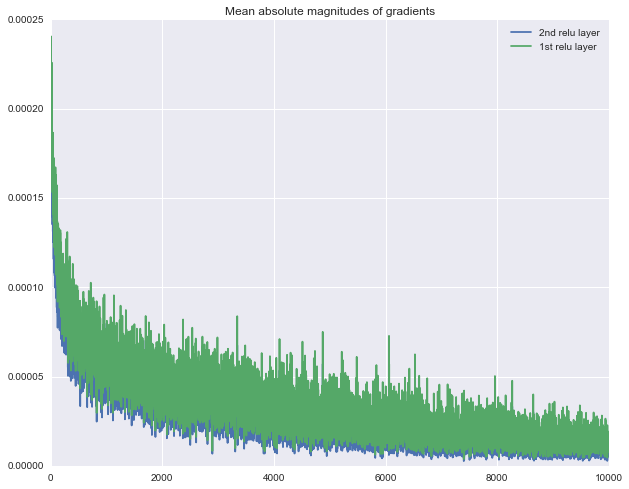

In [18]:
plt.plot(relu_model.gradientLayer2[10:])
plt.plot(relu_model.gradientLayer1[10:])
plt.title('Mean absolute magnitudes of gradients')
plt.legend(("2nd relu layer", "1st relu layer"))

In [19]:
print(relu_model.accuracy(X_val,y_val))

0.951587301587


### Plot of loss function of 3 non-linearities

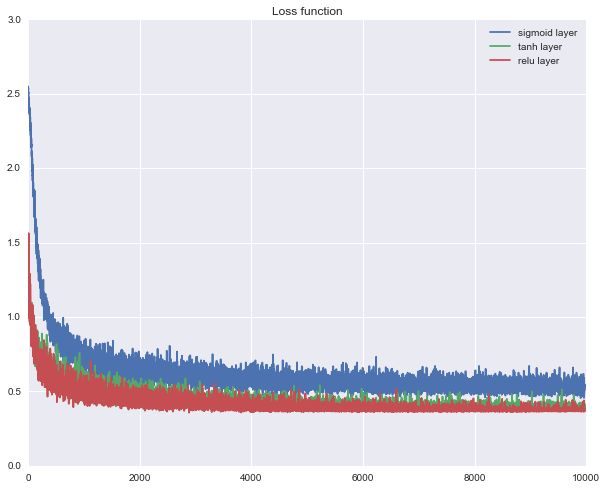

In [25]:
plt.plot(sigmoid_model.loss_history[25:])
plt.plot(model.loss_history[25:])
plt.plot(relu_model.loss_history[25:])
plt.title('Loss function')
plt.legend(("sigmoid layer","tanh layer","relu layer"))

## Plot of mean absolute gradient at the 2nd hidden layer for different non-linearities

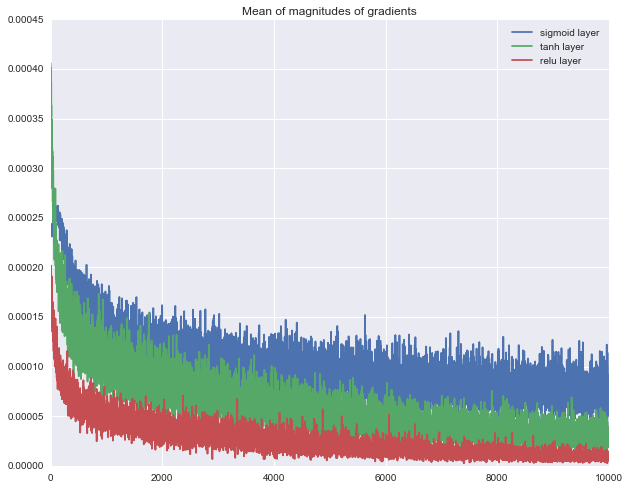

In [63]:
plt.plot(sigmoid_model.gradientLayer2[10:])
plt.plot(model.gradientLayer2[10:])
plt.plot(relu_model.gradientLayer2[10:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("sigmoid layer","tanh layer","relu layer"))

## Plot of mean absolute gradient at the 1st hidden layer for different non-linearities

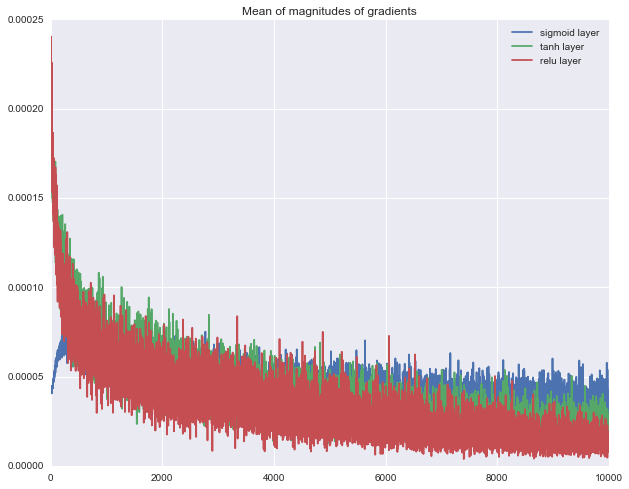

In [64]:
plt.plot(sigmoid_model.gradientLayer1[10:])
plt.plot(model.gradientLayer1[10:])
plt.plot(relu_model.gradientLayer1[10:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("sigmoid layer","tanh layer","relu layer"))

## Performing the Same Analysis on Neural Network with dense Hidden Layer

In [30]:
input_size=784
hiddenSize1=250
hiddenSize2 = 125
output_size=10
tanh_model_2 = MLP(input_size,hiddenSize1,hiddenSize2,output_size,hiddenLayer='tanh')

In [31]:
tanh_model_2.train(X_train,y_train,X_val=X_val,y_val=y_val,n_iters=10000,learning_rate=0.32)

Iteration 0, loss = 6.972222
Validation Accuracy :0.095556
Iteration 500, loss = 2.147592
Validation Accuracy :0.919206
Iteration 1000, loss = 1.963602
Validation Accuracy :0.931429
Iteration 1500, loss = 1.945130
Validation Accuracy :0.936190
Iteration 2000, loss = 1.956684
Validation Accuracy :0.938651
Iteration 2500, loss = 1.923431
Validation Accuracy :0.939762
Iteration 3000, loss = 1.934741
Validation Accuracy :0.940000
Iteration 3500, loss = 1.921951
Validation Accuracy :0.940952
Iteration 4000, loss = 1.921147
Validation Accuracy :0.941429
Iteration 4500, loss = 1.924275
Validation Accuracy :0.941667
Iteration 5000, loss = 1.923338
Validation Accuracy :0.941984
Iteration 5500, loss = 1.921646
Validation Accuracy :0.941905
Iteration 6000, loss = 1.930701
Validation Accuracy :0.942143
Iteration 6500, loss = 1.923109
Validation Accuracy :0.942540
Iteration 7000, loss = 1.922060
Validation Accuracy :0.942540
Iteration 7500, loss = 1.921824
Validation Accuracy :0.943016
Iteration 80

## Plot of the Mean Absolute Magnitude of Gradients at the 2 Hidden tanh layers

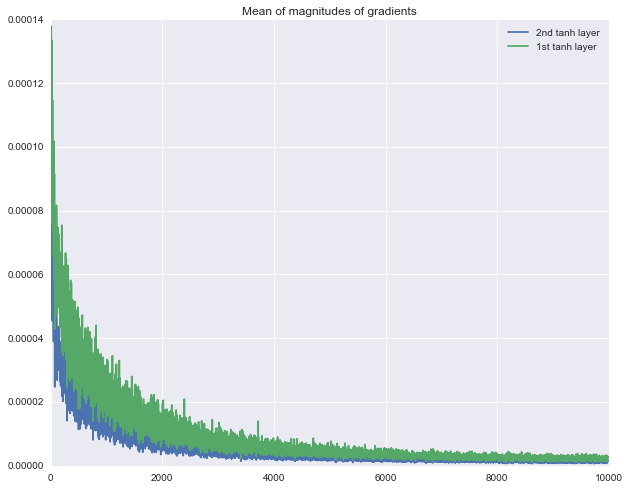

In [66]:
plt.plot(tanh_model_2.gradientLayer2[20:])
plt.plot(tanh_model_2.gradientLayer1[20:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("2nd tanh layer", "1st tanh layer"))

In [33]:
print(tanh_model_2.accuracy(X_val,y_val))

0.94380952381


In [34]:
sigmoid_model_2 = MLP(input_size,hiddenSize1,hiddenSize2,output_size,hiddenLayer='sigmoid')

In [35]:
sigmoid_model_2.train(X_train,y_train,X_val=X_val,y_val=y_val,n_iters=10000,learning_rate=0.3)

Iteration 0, loss = 5.509868
Validation Accuracy :0.084206
Iteration 500, loss = 2.305871
Validation Accuracy :0.904127
Iteration 1000, loss = 2.176262
Validation Accuracy :0.918651
Iteration 1500, loss = 2.078683
Validation Accuracy :0.929286
Iteration 2000, loss = 2.137189
Validation Accuracy :0.937778
Iteration 2500, loss = 2.131758
Validation Accuracy :0.943413
Iteration 3000, loss = 2.075597
Validation Accuracy :0.946111
Iteration 3500, loss = 2.011944
Validation Accuracy :0.949444
Iteration 4000, loss = 2.043846
Validation Accuracy :0.950556
Iteration 4500, loss = 2.133360
Validation Accuracy :0.952857
Iteration 5000, loss = 2.017091
Validation Accuracy :0.952698
Iteration 5500, loss = 2.095934
Validation Accuracy :0.954365
Iteration 6000, loss = 2.055747
Validation Accuracy :0.954762
Iteration 6500, loss = 2.023063
Validation Accuracy :0.955397
Iteration 7000, loss = 2.017408
Validation Accuracy :0.956825
Iteration 7500, loss = 2.013270
Validation Accuracy :0.956746
Iteration 80

## Plot of Mean Absolute Gradients at the 2 Hidden sigmoid layers

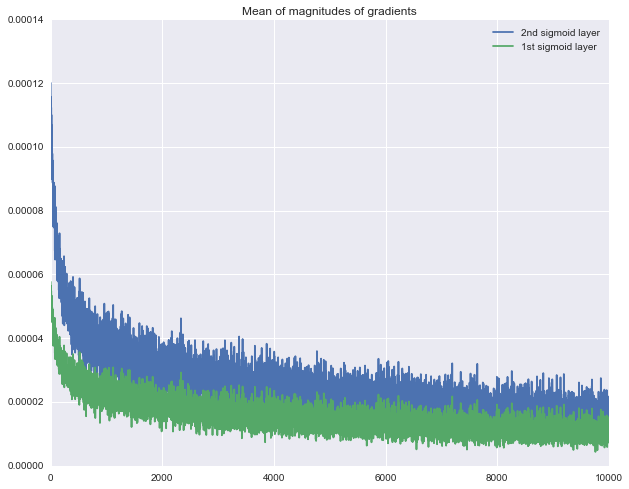

In [67]:
plt.plot(sigmoid_model_2.gradientLayer2[15:])
plt.plot(sigmoid_model_2.gradientLayer1[15:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("2nd sigmoid layer", "1st sigmoid layer"))

In [37]:
print(sigmoid_model_2.accuracy(X_val,y_val))

0.958253968254


In [48]:
relu_model_2 = MLP(input_size,hiddenSize1,hiddenSize2,output_size,hiddenLayer='relu')

In [49]:
relu_model_2.train(X_train,y_train,X_val=X_val,y_val=y_val,n_iters=10000,learning_rate=0.27)

Iteration 0, loss = 27.600243
Validation Accuracy :0.123810
Iteration 500, loss = 2.326862
Validation Accuracy :0.911270
Iteration 1000, loss = 2.197331
Validation Accuracy :0.926111
Iteration 1500, loss = 2.171604
Validation Accuracy :0.938651
Iteration 2000, loss = 2.166785
Validation Accuracy :0.940079
Iteration 2500, loss = 2.129179
Validation Accuracy :0.945714
Iteration 3000, loss = 2.114685
Validation Accuracy :0.947222
Iteration 3500, loss = 2.093196
Validation Accuracy :0.947619
Iteration 4000, loss = 2.088601
Validation Accuracy :0.948730
Iteration 4500, loss = 2.139848
Validation Accuracy :0.948254
Iteration 5000, loss = 2.080192
Validation Accuracy :0.948730
Iteration 5500, loss = 2.094754
Validation Accuracy :0.950238
Iteration 6000, loss = 2.111129
Validation Accuracy :0.950000
Iteration 6500, loss = 2.102908
Validation Accuracy :0.951825
Iteration 7000, loss = 2.105642
Validation Accuracy :0.951190
Iteration 7500, loss = 2.083154
Validation Accuracy :0.950794
Iteration 8

## Plot of Mean Absolute Gradient at the 2 hidden relu layers

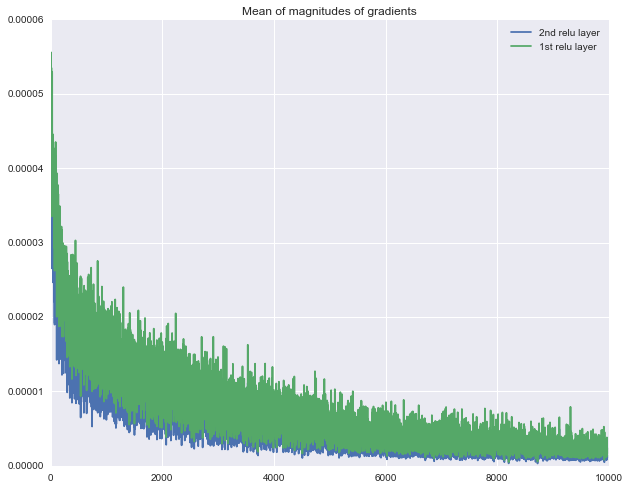

In [68]:
plt.plot(relu_model_2.gradientLayer2[25:])
plt.plot(relu_model_2.gradientLayer1[25:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("2nd relu layer", "1st relu layer"))

In [51]:
print(relu_model_2.accuracy(X_val,y_val))

0.951825396825


## Plot of loss functions for 3 activations

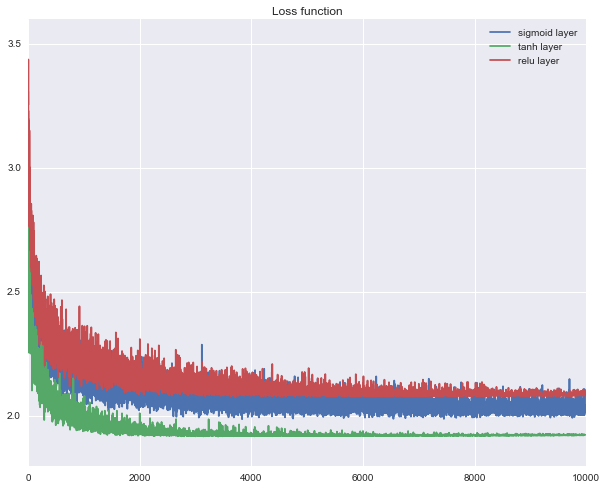

In [52]:
plt.plot(sigmoid_model_2.loss_history[25:])
plt.plot(tanh_model_2.loss_history[25:])
plt.plot(relu_model_2.loss_history[25:])
plt.title('Loss function')
plt.legend(("sigmoid layer","tanh layer","relu layer"))

## Plot of mean absolute gradients at 2nd hidden layer for different activations

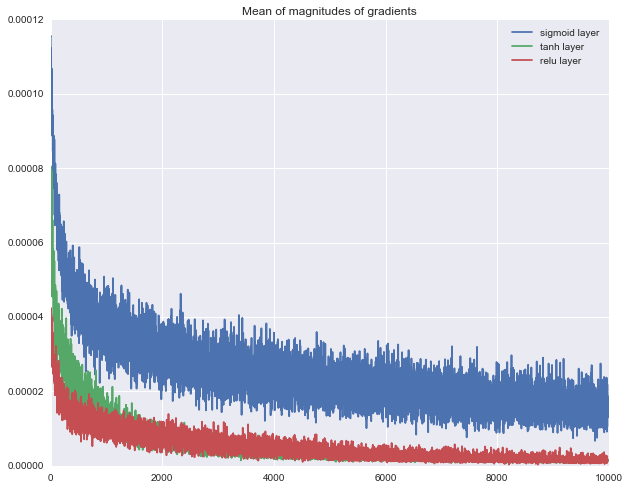

In [53]:
plt.plot(sigmoid_model_2.gradientLayer2[20:])
plt.plot(tanh_model_2.gradientLayer2[20:])
plt.plot(relu_model_2.gradientLayer2[20:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("sigmoid layer","tanh layer","relu layer"))

## Plot of mean absolute gradients at 1st hidden layer for different activations

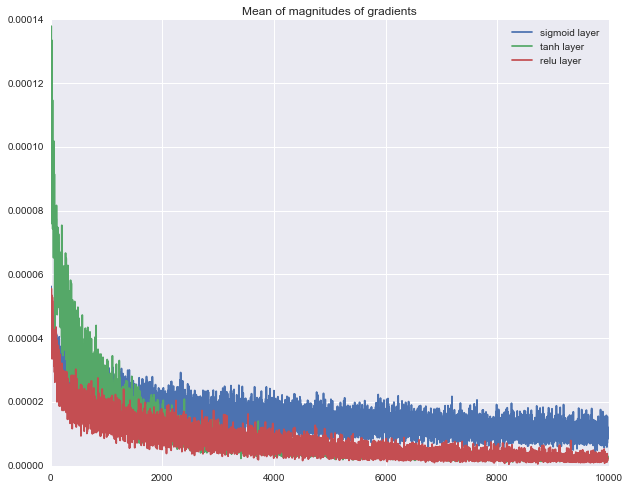

In [54]:
plt.plot(sigmoid_model_2.gradientLayer1[20:])
plt.plot(tanh_model_2.gradientLayer1[20:])
plt.plot(relu_model_2.gradientLayer1[20:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("sigmoid layer","tanh layer","relu layer"))

## Plot of Mean absolute gradient at 1st hidden of Dense & Sparse model of Sigmoid layer Neural Network

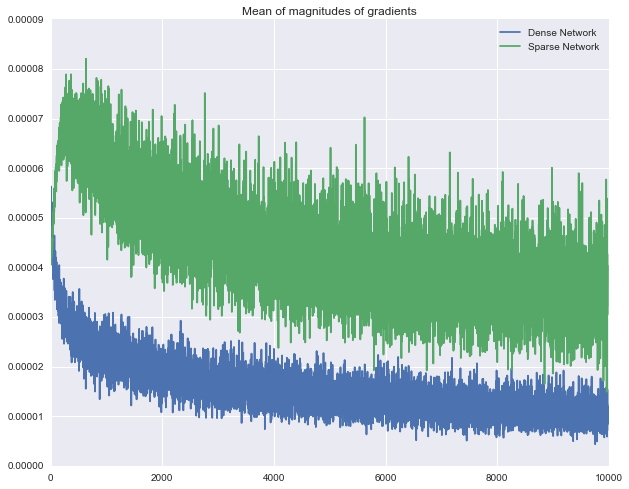

In [55]:
plt.plot(sigmoid_model_2.gradientLayer1[20:])
plt.plot(sigmoid_model.gradientLayer1[20:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("Dense Network","Sparse Network"))

## Plot of Mean absolute gradient at 2nd hidden of Dense & Sparse model of Sigmoid layer Neural Network

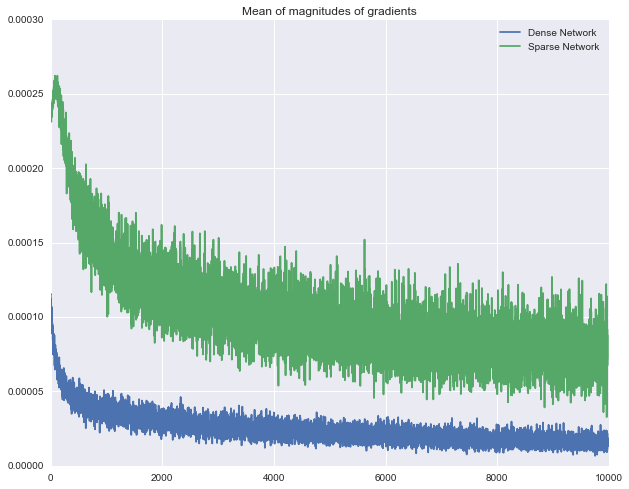

In [69]:
plt.plot(sigmoid_model_2.gradientLayer2[20:])
plt.plot(sigmoid_model.gradientLayer2[20:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("Dense Network","Sparse Network"))

## Plot of Mean absolute gradient at 1st hidden of Dense & Sparse model of tanh layer Neural Network

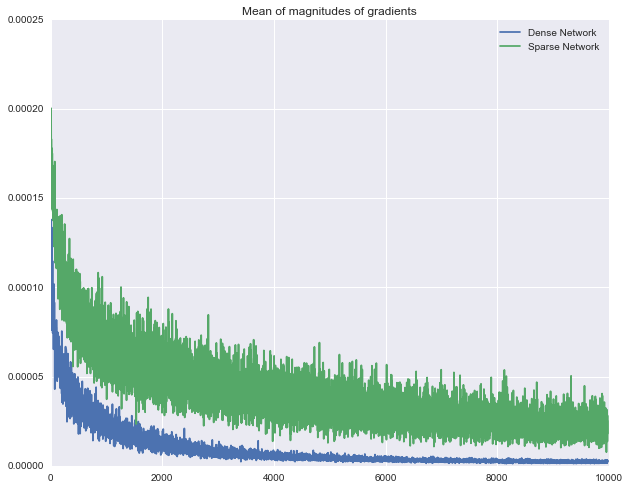

In [57]:
plt.plot(tanh_model_2.gradientLayer1[20:])
plt.plot(model.gradientLayer1[20:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("Dense Network","Sparse Network"))

## Plot of Mean absolute gradient at 2nd hidden of Dense & Sparse model of tanh layer Neural Network

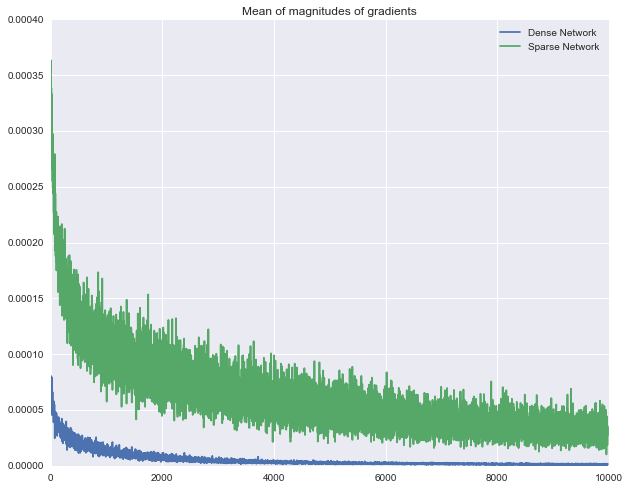

In [58]:
plt.plot(tanh_model_2.gradientLayer2[20:])
plt.plot(model.gradientLayer2[20:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("Dense Network","Sparse Network"))

## Plot of Mean absolute gradient at 1st hidden of Dense & Sparse model of Relu layer Neural Network

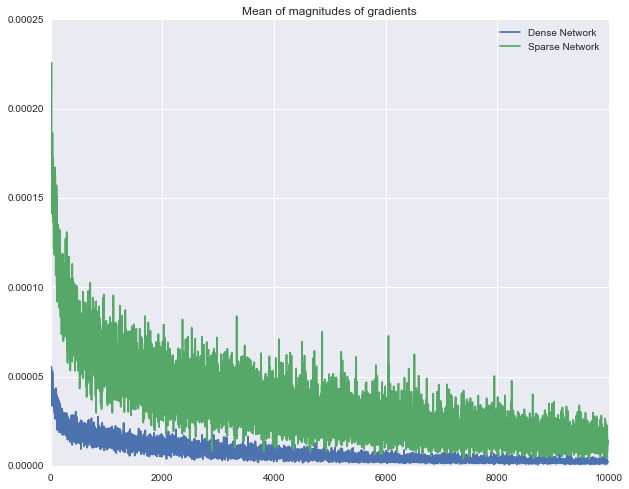

In [59]:
plt.plot(relu_model_2.gradientLayer1[20:])
plt.plot(relu_model.gradientLayer1[20:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("Dense Network","Sparse Network"))

## Plot of Mean absolute gradient at 2nd hidden of Dense & Sparse model of Relu layer Neural Network

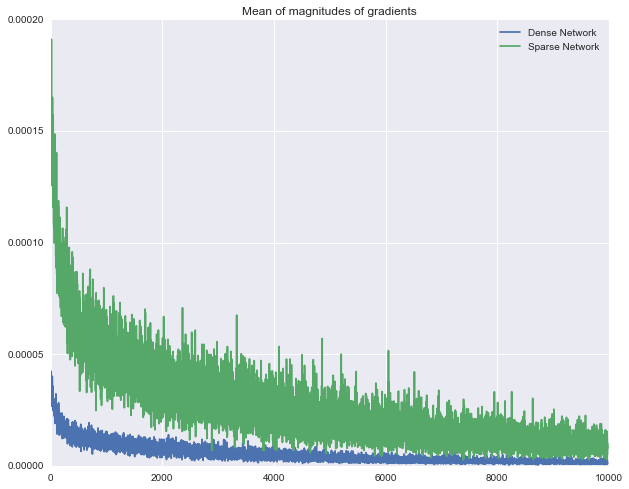

In [60]:
plt.plot(relu_model_2.gradientLayer2[20:])
plt.plot(relu_model.gradientLayer2[20:])
plt.title('Mean of magnitudes of gradients')
plt.legend(("Dense Network","Sparse Network"))